# **About this project**
In my project, I focus on applying Mean-Variance Optimization (MVO) to the Vietnam stock market. This project aims to optimize a stock portfolio and identity the best-performing portfolio by using MVO and another methods.

## **Install and import necessary libraries**
**vnstock** is a reputable library of comprehensive financial data on the Vietnam stock market. This platform offers accurate and current information, essential for conducting financial analysis and generating meaningful insights.


In [ ]:
#Install vn-stock library
!pip install -U vnstock

In [ ]:
#Import necessary libraries
from vnstock import *
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as sci_plt

from pprint import pprint
from sklearn.preprocessing import StandardScaler

#Set the some display option for Pandas
pd.set_option('display.max_colwidth',None)
pd.set_option('expand_frame_repr', False)

## **Stocks in portfolio**
The portfolio which I have constructed includes a selection of stocks from Hochiminh Stock Exchange (HOSE) in Vietnam stock market. The chosen stocks are:

- **VPI:** Van Phu - Invest Investment Joint Stock Company
- **GEX:** Gelex Group Joint Stock Company
- **PNJ:** Phu Nhuan Jewelry Joint Stock Company
- **FPT:** FPT Corporation

These stocks were selected based on their performance metrics, market potential, and their ability to contribute to an optimal risk-return balance.

In [ ]:
# Create stock list
stock_list = ['VPI','GEX','PNJ','FPT']
# Initialize an empty dictionary to store the data
stock_data = {}

# Fetch historical data for each stock symbol
for symbol in stock_list:
    stock_data[symbol] = stock_historical_data(symbol, '2019-7-19', '2024-7-19', '1D', 'stock')
print(stock_data)

{'VPI':             time   open   high    low  close   volume ticker
0     2019-07-22  21450  21450  21210  21230   253370    VPI
1     2019-07-23  21320  21420  21170  21170   277190    VPI
2     2019-07-24  21170  21370  21170  21230   201500    VPI
3     2019-07-25  21230  21340  21190  21290   291980    VPI
4     2019-07-26  21270  21580  21270  21500    82390    VPI
...          ...    ...    ...    ...    ...      ...    ...
1247  2024-07-15  50500  50670  50420  50670  1261500    VPI
1248  2024-07-16  50670  50830  50580  50670  1086900    VPI
1249  2024-07-17  50750  50830  50420  50500  1207400    VPI
1250  2024-07-18  50500  51250  50330  51080  1283900    VPI
1251  2024-07-19  51250  51420  51080  51330  1064100    VPI

[1252 rows x 7 columns], 'GEX':             time   open   high    low  close    volume ticker
0     2019-07-22  13480  13540  13290  13420    644020    GEX
1     2019-07-23  13420  13480  13290  13480    937080    GEX
2     2019-07-24  13480  13850  13420  13

## **Transform data**
This section involves cleaning and preprocessing the raw stock data to ensure accuracy and reliability. By handling missing values, and deriving relevant financial metrics, I transform the raw data into a structured format suitable for analysis. This process is crucial for building strong and effective portfolio optimization models.

In [ ]:
# Concatenate the DataFrames
combined_df = pd.concat(stock_data.values(), keys=stock_data.keys())

# Display the combined DataFrame
combined_df

time    open    high     low   close    volume ticker
VPI 0     2019-07-22   21450   21450   21210   21230    253370    VPI
    1     2019-07-23   21320   21420   21170   21170    277190    VPI
    2     2019-07-24   21170   21370   21170   21230    201500    VPI
    3     2019-07-25   21230   21340   21190   21290    291980    VPI
    4     2019-07-26   21270   21580   21270   21500     82390    VPI
...              ...     ...     ...     ...     ...       ...    ...
FPT 1247  2024-07-15  133500  134800  132300  132700   3067200    FPT
    1248  2024-07-16  133600  134500  132300  134000   4002300    FPT
    1249  2024-07-17  134000  134100  129900  131900   6970100    FPT
    1250  2024-07-18  131400  131400  127800  127900  10800200    FPT
    1251  2024-07-19  128600  129300  126000  126000   6551700    FPT

[5008 rows x 7 columns]

In [ ]:
# Grab the necessary columns
price_data_frame = combined_df[['time','close','ticker']]
display(price_data_frame)

time   close ticker
VPI 0     2019-07-22   21230    VPI
    1     2019-07-23   21170    VPI
    2     2019-07-24   21230    VPI
    3     2019-07-25   21290    VPI
    4     2019-07-26   21500    VPI
...              ...     ...    ...
FPT 1247  2024-07-15  132700    FPT
    1248  2024-07-16  134000    FPT
    1249  2024-07-17  131900    FPT
    1250  2024-07-18  127900    FPT
    1251  2024-07-19  126000    FPT

[5008 rows x 3 columns]

In [ ]:
# Pivot the Data Frame to make the Symbols the Headers
price_data_frame = price_data_frame.pivot_table(
    index='time',
    columns='ticker',
    values='close'
  )

# Display the pivoted DataFrame
display(price_data_frame)

ticker,FPT,GEX,PNJ,VPI
time,,,,
2019-07-22,20240,13420,51960,21230
2019-07-23,20420,13480,52820,21170
2019-07-24,20350,13850,52300,21230
2019-07-25,20360,14100,53330,21290
2019-07-26,20420,14040,53330,21500
...,...,...,...,...
2024-07-15,132700,23500,97700,50670
2024-07-16,134000,23000,97100,50670
2024-07-17,131900,22100,95900,50500


In [ ]:
# Check missing values
print(price_data_frame[price_data_frame.isnull().any(axis=1)])

Empty DataFrame
Columns: [FPT, GEX, PNJ, VPI]
Index: []


In [ ]:
# Count missing values per column
missing_values_per_column = price_data_frame.isna().sum()
print("Missing values per column:")
print(missing_values_per_column)

Missing values per column:
ticker
FPT    0
GEX    0
PNJ    0
VPI    0
dtype: int64


In [ ]:
#Extract data to csv
price_data_frame.to_csv('price_data.csv', index=True)

In [ ]:
price_data = pd.read_csv("price_data.csv", parse_dates=True, index_col="time")
price_data

,FPT,GEX,PNJ,VPI
time,,,,
2019-07-22,20240,13420,51960,21230
2019-07-23,20420,13480,52820,21170
2019-07-24,20350,13850,52300,21230
2019-07-25,20360,14100,53330,21290
2019-07-26,20420,14040,53330,21500
...,...,...,...,...
2024-07-15,132700,23500,97700,50670
2024-07-16,134000,23000,97100,50670
2024-07-17,131900,22100,95900,50500


## **Calculate return, volatility, covariance and correlation**
In this section, I calculate the essential financial metrics for the selected stocks, including return, volatility, covariance, and correlation. These metrics form the basis for understanding the risk and return concept of each stock and their interrelationships, which are crucial for effective portfolio optimization.

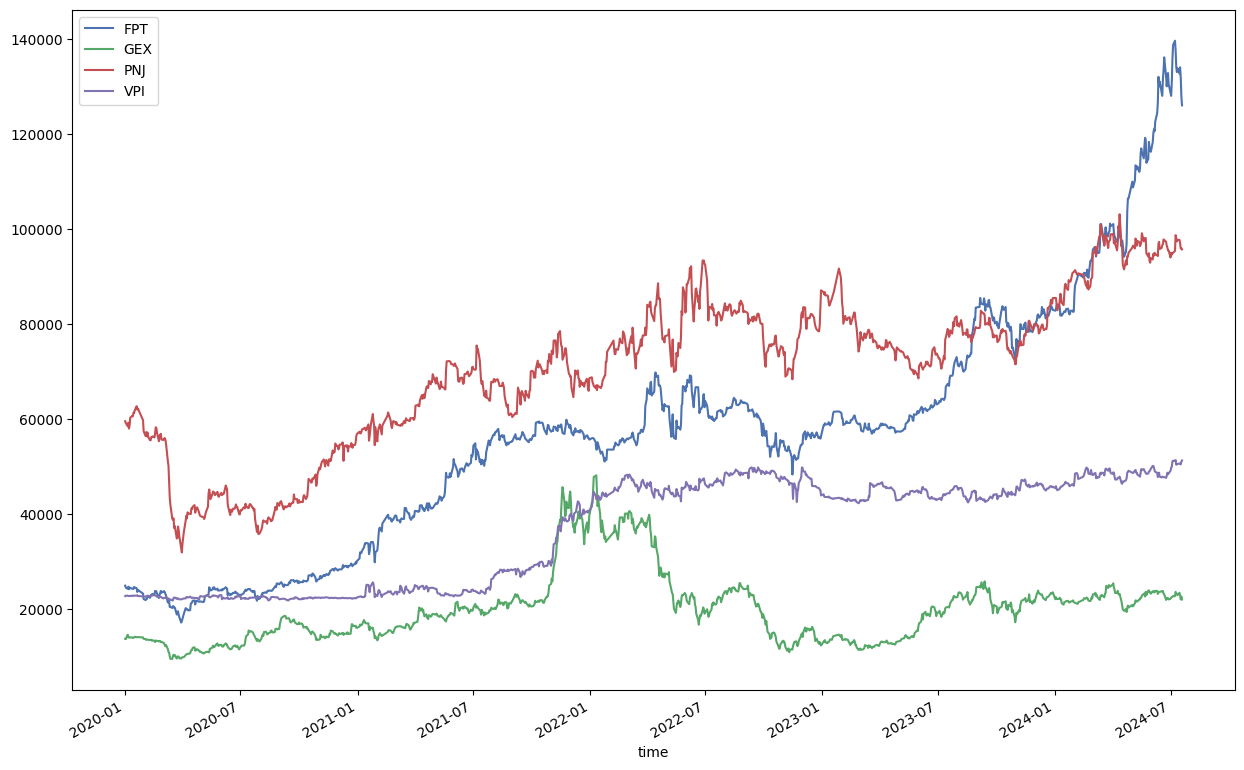

In [ ]:
# Plot line chart to see stock price trends
price_data[price_data.index >= '2020-01-01'].plot(figsize=(15, 10))
plt.show()

In [ ]:
# Calculate the log returns.
log_return = np.log(1 + price_data.pct_change())
# Drop the first row with NaN values
log_return = log_return.dropna()
# Calculate the mean daily return
mean_daily_returns = log_return.mean()

# Annualize the mean daily return
annual_returns = mean_daily_returns * 252

# Display the annualized mean daily return
print("Annualized Mean Daily Return:")
print(annual_returns)

Annualized Mean Daily Return:
FPT    0.368650
GEX    0.100564
PNJ    0.123126
VPI    0.177985
dtype: float64


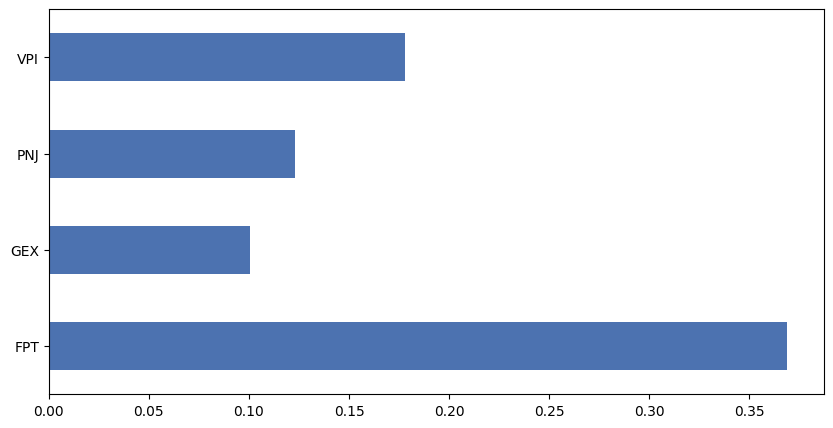

In [ ]:
# Plot bar chart for Annual returns
annual_returns.plot(kind='barh', figsize=(10, 5))
plt.show()

In [ ]:
# Calculate volatility
volatility = log_return.std() * np.sqrt(252)

# Display the volatility
print("Volatility:")
print(volatility)

Volatility:
FPT    0.277877
GEX    0.464175
PNJ    0.309492
VPI    0.202891
dtype: float64


In [ ]:
# Calculate the covariance and correlation matrix
cov_matrix = log_return.cov()*252
corr_matrix = log_return.corr()

print("Covariance Marix:")
display(cov_matrix)

print("\nCorrelation Matrix:")
display(corr_matrix)

Covariance Marix:


,FPT,GEX,PNJ,VPI
FPT,0.077216,0.049504,0.046013,0.014186
GEX,0.049504,0.215459,0.048892,0.028170
PNJ,0.046013,0.048892,0.095785,0.014461
VPI,0.014186,0.028170,0.014461,0.041165



Correlation Matrix:


,FPT,GEX,PNJ,VPI
FPT,1.000000,0.383797,0.535035,0.251616
GEX,0.383797,1.000000,0.340338,0.299114
PNJ,0.535035,0.340338,1.000000,0.230296
VPI,0.251616,0.299114,0.230296,1.000000


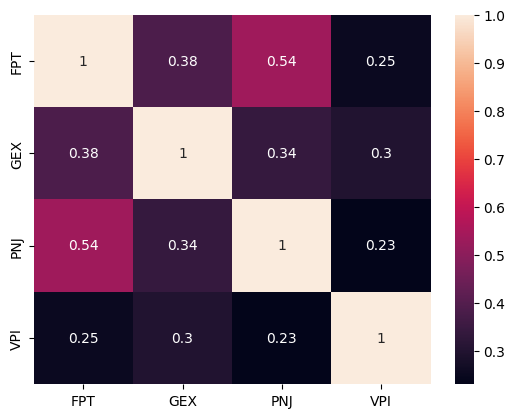

In [ ]:
#Plot heatmap for correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()


## **Optimize the portfolio**
Optimizing a portfolio using the Sharpe ratio involves constructing a portfolio that maximizes the Sharpe ratio, which is a measure of risk-adjusted return. The Sharpe ratio is defined as the difference between the portfolio return and the risk-free rate, divided by the portfolio's standard deviation (volatility). This ratio helps investors understand how much excess return they are receiving for the extra volatility they are exposed to by holding a risky asset.

Mathematically, we define the Sharpe Ratio as the following:

\begin{equation*}
\text{Sharpe Ratio} = \frac{(R_p - R_f)}{\sigma_p}
\end{equation*}

Where:

$
\begin{align}
\ R_p & = \text{Return of Portfolio} \\
\ R_f & = \text{Risk-Free Rate} \\
\ \sigma_p & = \text{Standard Deviation of Portfolio's Excess Return} \\
\end{align}
$

To calculate the expected returns, we use the following formula:

\begin{equation*}
\ R_p = (w_{1}r_{1}) + (w_{2}r_{2}) + \cdots + (w_{n}r_{n})
\end{equation*}

Where:

$
\begin{align}
\ r_{i} & = \text{Return of Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\end{align}
$

To calculate the standard deviation of the protfolio, we use the following formula:

\begin{equation*}
\ \sigma_p = \sqrt{(w_{i}^2 \sigma_i^2) + (w_{j}^2 \sigma_j^2) + (2w_{j}w_{i} p_{i,j} \sigma_i \sigma_j)}
\end{equation*}

Where:

$
\begin{align}
\ \sigma_{i} & = \text{Standard Deviation of Returns for Security i} \\
\ w_{i} & = \text{Weight of Security i} \\
\ p_{i,j} & = \text{Correlation Coefficent between the returns of asset i and asset j} \\
\end{align}
$


In [ ]:
# Generate some random weights.
random_weights = np.random.random(len(price_data.columns))
random_weights /= np.sum(random_weights)

# Calculate the Expected Returns.
expected_returns = np.sum((log_return.mean()* random_weights) * 252)

# Calculate the Expected Volatility.
expected_volatility = np.sqrt(
    np.dot(random_weights.T,
           np.dot(
               log_return.cov() * 252
               , random_weights
               )
           )
    )
# Calculate the Sharpe Ratio
sharpe_ratio = (expected_returns-0.01)/ expected_volatility
print("Random Weight:",random_weights)
print("Expected Returns:", expected_returns)
print("Expected Volatility:", expected_volatility)
print("Sharpe Ratio:", sharpe_ratio)

Random Weight: [0.60336796 0.14318564 0.0066268  0.2468196 ]
Expected Returns: 0.28157700272113884
Expected Volatility: 0.2243163329376776
Sharpe Ratio: 1.210687599803942


## **Monte Carlo simulations**

Monte Carlo simulations are used to model the probability of different outcomes in our portfolio's performance. By running numerous simulations, we can assess the potential risks and returns under various market conditions, then we can identify the best-performing portfolio.

In [ ]:
# Define the number of portfolios to run the simulation
num_of_portfolios = 3000

# Prep the weight array of numpy zeros
all_weights = np.zeros((num_of_portfolios, len(price_data.columns)))

# Prep the returns array of numpy zeros
ret_arr = np.zeros(num_of_portfolios)

# Prep the volatility array of numpy zeros
vol_arr = np.zeros(num_of_portfolios)

# Prep the sharpe array of numpy zeros
sharpe_arr = np.zeros(num_of_portfolios)

# Run the simulation
for i in range(num_of_portfolios):
    # Generate random weights
    weights = np.array(np.random.random(len(price_data.columns)))
    weights /= np.sum(weights)

    # Save the weights
    all_weights[i, :] = weights

    # Calculate the Expected Log Return
    ret_arr[i] = np.sum((log_return.mean() * weights) * 252)

    # Calculate the Expected Volatility
    vol_arr[i] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # Calculate the Sharpe Ratio
    sharpe_arr[i] = (ret_arr[i]-0.01) / vol_arr[i]

    # Combine them all together
    simulation_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

    # Create a Dataframe for the array
    simulation_df = pd.DataFrame(data=simulation_data)
    simulation_df = simulation_df.T
    simulation_df.columns = [
        'Expected Returns',
        'Expected Volatility',
        'Sharpe Ratio',
        'Weights']
    simulation_df = simulation_df.infer_objects()

# Print out the results
print(simulation_df.head())

   Expected Returns  Expected Volatility  Sharpe Ratio                                                                               Weights
0          0.204404             0.209444      0.928191    [0.2758685684620736, 0.16751422294888277, 0.2407962828512675, 0.31582092573777615]
1          0.218981             0.234923      0.889570   [0.35180001511069176, 0.303188233647123, 0.047522792473048726, 0.29748895876913656]
2          0.139047             0.252446      0.511187      [0.037890911668476, 0.35285967086267417, 0.3434915645400455, 0.2657578529288044]
3          0.208741             0.188810      1.052598  [0.25305211415037887, 0.07668185758724251, 0.21063612121939088, 0.45962990704298773]
4          0.176517             0.288065      0.578053  [0.22389044942314826, 0.48898538861694507, 0.11481324877223913, 0.17231091318766745]


## **Identify a stock portfolio with Max Sharpe Ratio**
After running the Monte Carlo simulations, I identify a stock portfolio with the maximum Sharpe ratio. This portfolio is the best-performing one based on the Sharpe ratio, offering the highest risk-adjusted return.


In [ ]:
# Grab the Max Sharpe Ratio
max_sharpe_ratio = simulation_df.loc[simulation_df['Sharpe Ratio'].idxmax()]
# Print out the results
print('MAX SHAPRE RATIO:')
max_sharpe_ratio

MAX SHAPRE RATIO:


Expected Returns                                                                                     0.28424
Expected Volatility                                                                                  0.20276
Sharpe Ratio                                                                                        1.352536
Weights                [0.5740070226792878, 0.022808364328215824, 0.025923740825683658, 0.37726087216681264]
Name: 1313, dtype: object

In [ ]:
from collections import OrderedDict
stock_order = ['FPT','GEX','PNJ','VPI']
#Grab weights of stocks in portfolio
weights_max = max_sharpe_ratio['Weights']
weights_max_name = dict(zip(stock_order, weights_max))

#Create an OrderedDict with the weights
ordered_weights = OrderedDict(weights_max_name)

print(ordered_weights)

OrderedDict([('FPT', 0.5740070226792878), ('GEX', 0.022808364328215824), ('PNJ', 0.025923740825683658), ('VPI', 0.37726087216681264)])


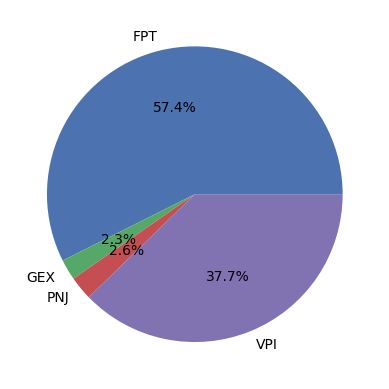

In [ ]:
#Plot pie chart for weights of stocks
plt.pie(weights_max, labels=price_data.columns, autopct='%1.1f%%')
plt.show()

## **Allocate asset with a certain capital**
This section focuses on practical asset allocation based on a specified capital amount. We determine the optimal investment in each stock to achieve the desired portfolio structure.

PyPortfolioOpt is a Python library designed for portfolio optimization. It provides a variety of tools for constructing and analyzing investment portfolios. In this project, I use PyPortfolioOpt to identify asset allocation with a specific capital amount of 100,000,000 VND.


In [ ]:
!pip install PyPortfolioOpt

In [ ]:
import pypfopt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(price_data)
latest_prices = latest_prices.astype('float64')
print(latest_prices)

FPT    126000.0
GEX     22100.0
PNJ     95700.0
VPI     51330.0
Name: 2024-07-19 00:00:00, dtype: float64


In [ ]:
da = DiscreteAllocation(ordered_weights, latest_prices, total_portfolio_value=100000000)
# Number of shares of each stock to purchase
allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: {:.2f}".format(leftover),"VND")

Discrete allocation: {'FPT': 455, 'VPI': 734, 'PNJ': 28, 'GEX': 104}
Funds remaining: 15780.00 VND


## **Identify a stock portfolio with Min Volatility**
In this section, I grab a stock portfolio with the lowest volatility. This low-volatility portfolio is designed for risk-averse investors who prioritize capital preservation and steady returns.

In [ ]:
# Grab the Min Volatility
min_volatility = simulation_df.loc[simulation_df['Expected Volatility'].idxmin()]
# Print out the results
print('MIN VOLATILITY:')
min_volatility

MIN VOLATILITY:


Expected Returns                                                                                   0.216901
Expected Volatility                                                                                0.179165
Sharpe Ratio                                                                                        1.15481
Weights                [0.24488351431512903, 0.013335373231704774, 0.12288932950757553, 0.6188917829455907]
Name: 2736, dtype: object

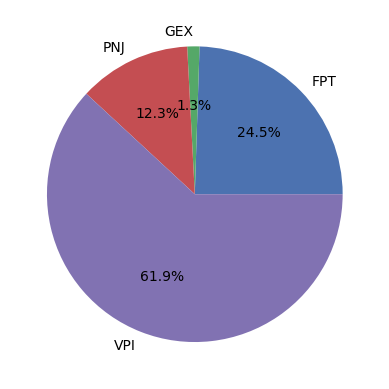

In [ ]:
#Grab weights of stocks in portfolio
weights_min = min_volatility['Weights']

#Plot pie chart for weights of stocks
plt.pie(weights_min, labels=price_data.columns, autopct='%1.1f%%')
plt.show()


## **Visualize the result with Efficient Frontier**
Finally, we visualize the optimized portfolio results using the Efficient Frontier. The chart provides a comprehensive view of portfolio performance, highlighting the efficient frontier and key portfolio choices based on Sharpe ratio and volatility.

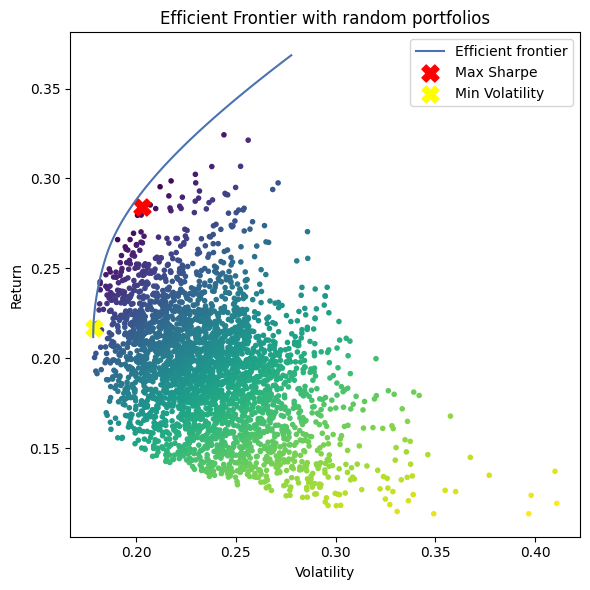

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import plotting
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(annual_returns, cov_matrix)
fig, ax = plt.subplots(figsize= (6,6))
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

sharpes = simulation_df['Sharpe Ratio']
ret_tangent = max_sharpe_ratio['Expected Returns']
std_tangent =  max_sharpe_ratio['Expected Volatility']

ret_min = min_volatility['Expected Returns']
std_min = min_volatility['Expected Volatility']

# Plot random portfolios
ax.scatter(simulation_df['Expected Volatility'], simulation_df['Expected Returns'], marker=".", c=sharpes, cmap="viridis_r")
ax.scatter(std_tangent, ret_tangent, c='red', marker='X',s=150, label= 'Max Sharpe')
ax.scatter(std_min, ret_min, c='yellow', marker='X',s=150, label= 'Min Volatility')
# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()